In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


In [6]:
dataset_f = "age"
train_f = f'{dataset_f}/train'
test_f = f'{dataset_f}/test'

classes = ["1-10", "11-19", "20-29", "30-39", "40-49", "50-59", "60-110"]

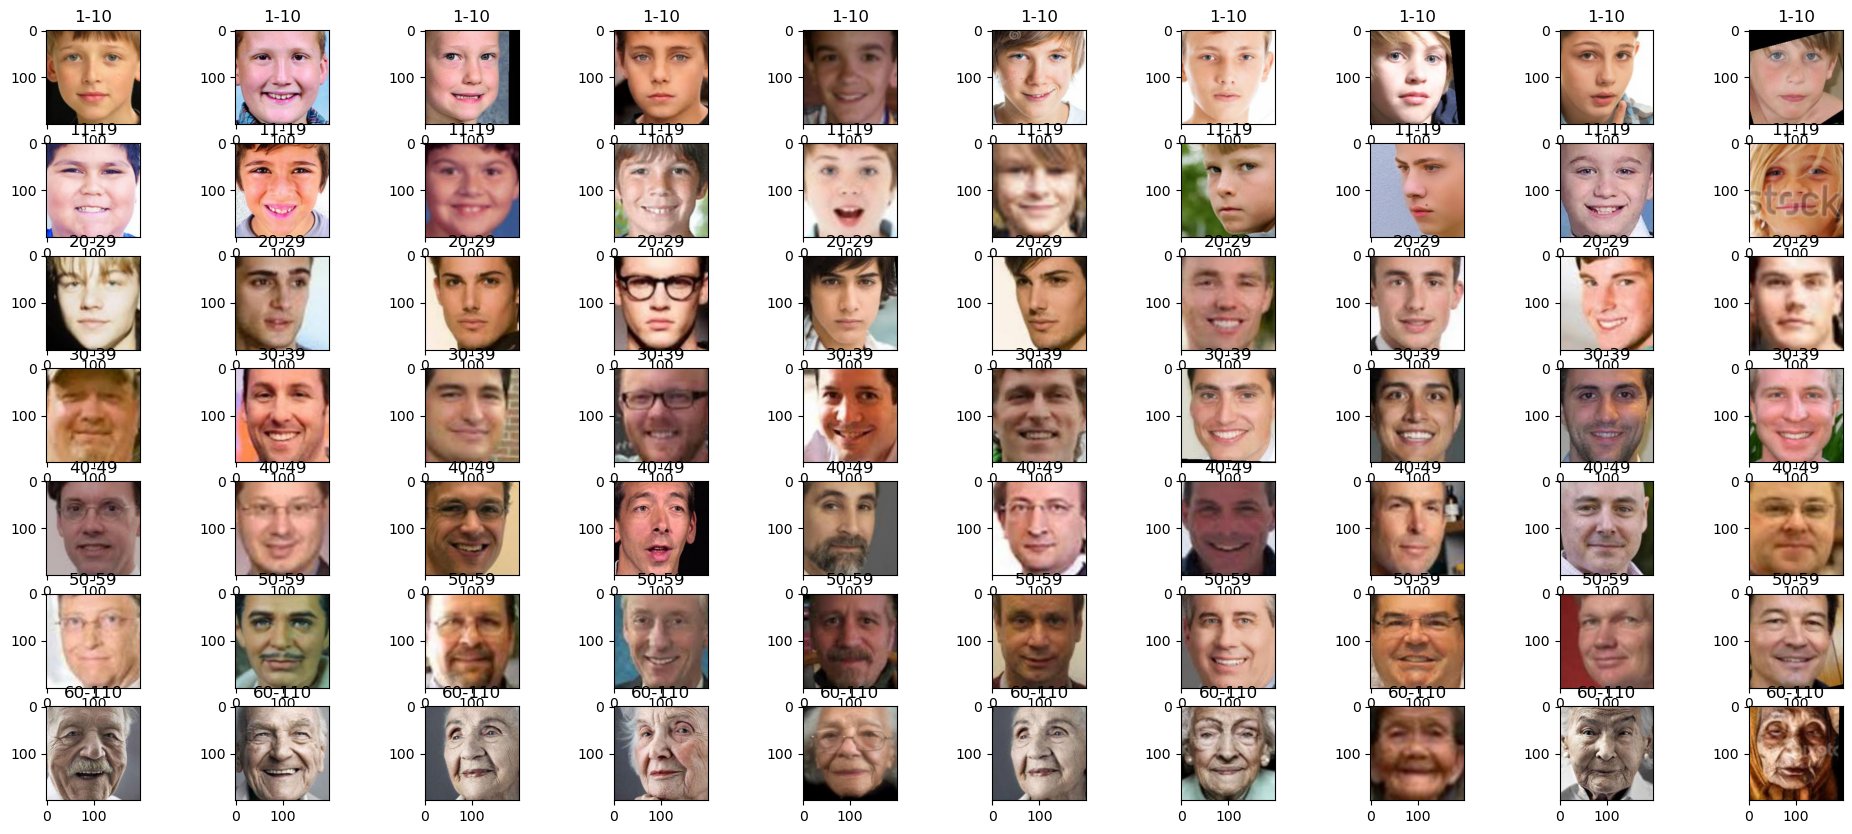

In [7]:
images_per_class = 10
fig, ax = plt.subplots(7, images_per_class, figsize=(24, 10))
for j in range(7):
    images = os.listdir(f'{train_f}/{classes[j]}')
    for i in range(images_per_class):
        image = plt.imread(f'{train_f}/{classes[j]}/{images[i]}')
        ax[j, i].set_title(classes[j])
        ax[j, i].imshow(image)

In [25]:
batch_size = 80
image_size = (200, 200)
datagen_train = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')
train_generator = datagen_train.flow_from_directory(train_f,
                                                batch_size=batch_size,
                                                target_size= image_size,
                                                class_mode= "categorical",
                                                shuffle = True)
datagen_validation = ImageDataGenerator(rescale=1./255,width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')
validation_generator = datagen_validation.flow_from_directory(test_f,
                                                batch_size=batch_size,
                                                target_size= image_size,
                                                class_mode= "categorical",
                                                shuffle = True)

Found 23494 images belonging to 7 classes.
Found 3646 images belonging to 7 classes.


In [26]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [27]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [28]:
def model_age(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [29]:
model = model_age((200,200,3))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 200, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 200, 200, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      20,480,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,609,991 (78.62 MB)

 Trainable params: 20,609,031 (78.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [30]:
epochs = 8
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_age.weights.h5", monitor ="val_accuracy", save_weights_only = True, mode = "max", verbose =1)
callbacks = (checkpoint,)

In [31]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs, 
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3241 - loss: 1.8680
Epoch 1: saving model to model_age.weights.h5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1667s 6s/step - accuracy: 0.3242 - loss: 1.8676 - val_accuracy: 0.3131 - val_loss: 1.9469
Epoch 2/8
  1/293 ━━━━━━━━━━━━━━━━━━━━ 22:40 5s/step - accuracy: 0.4000 - loss: 1.6986
Epoch 2: saving model to model_age.weights.h5
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4000 - loss: 1.6986 - val_accuracy: 0.3043 - val_loss: 1.8815
Epoch 3/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4177 - loss: 1.5313
Epoch 3: saving model to model_age.weights.h5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1697s 6s/step - accuracy: 0.4178 - loss: 1.5311 - val_accuracy: 0.3039 - val_loss: 1.8263
Epoch 4/8
  1/293 ━━━━━━━━━━━━━━━━━━━━ 22:51 5s/step - accuracy: 0.3750 - loss: 1.6301
Epoch 4: saving model to model_age.weights.h5
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3750 - loss: 1.6301 - val_accuracy: 0.3478 - val_loss: 1.8574
Ep

In [32]:
model.evaluate(validation_generator)

46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4626 - loss: 1.3666


[1.4130136966705322, 0.44404828548431396]

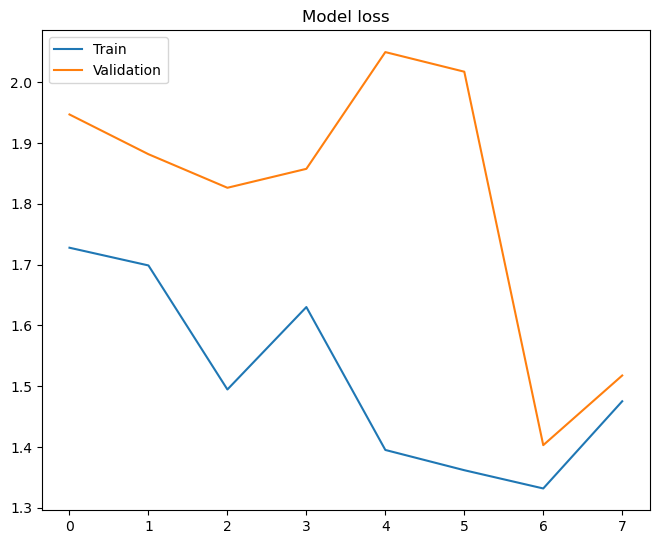

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

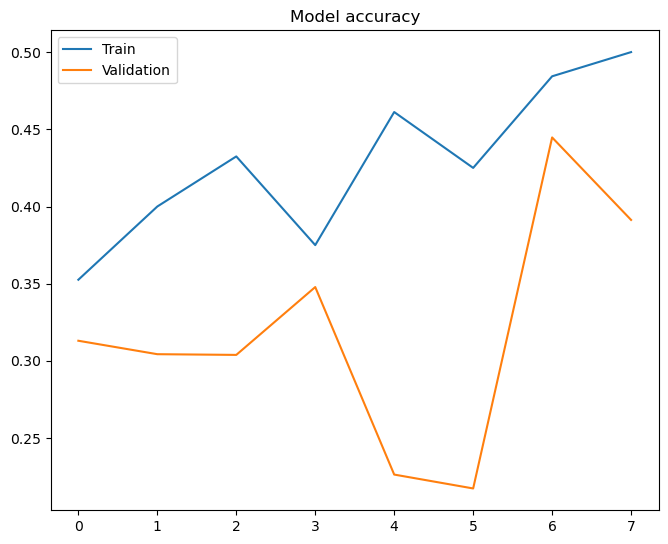

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [35]:
model_json = model.to_json()
with open("model_age3.json","w") as json_file:
    json_file.write(model_json)